<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.589669,39.737479,-0.005357,96.321791,96.326719,-0.004927
1,0.0,1.0,78.828887,98.516300,0.001684,187.346871,187.345923,0.000948
2,0.0,2.0,81.179844,48.156976,-0.010074,139.326746,139.337384,-0.010639
3,0.0,3.0,52.718845,44.897917,0.000330,107.617091,107.616525,0.000566
4,0.0,4.0,72.343451,86.086940,-0.001009,168.429383,168.430890,-0.001507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.043522,34.524993,0.001617,72.570132,72.566944,0.003187
119996,999.0,116.0,91.480348,97.335752,0.000119,198.816218,198.816599,-0.000380
119997,999.0,117.0,96.495985,60.802762,-0.001583,167.297164,167.298441,-0.001277
119998,999.0,118.0,37.747740,54.267487,0.002267,102.017494,102.014209,0.003285


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.589669,39.737479,-0.005357,96.321791,96.326719,-0.004927
1,0.0,1.0,78.828887,98.516300,0.001684,187.346871,187.345923,0.000948
2,0.0,2.0,81.179844,48.156976,-0.010074,139.326746,139.337384,-0.010639
3,0.0,3.0,52.718845,44.897917,0.000330,107.617091,107.616525,0.000566
4,0.0,4.0,72.343451,86.086940,-0.001009,168.429383,168.430890,-0.001507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.043522,34.524993,0.001617,72.570132,72.566944,0.003187
119996,999.0,116.0,91.480348,97.335752,0.000119,198.816218,198.816599,-0.000380
119997,999.0,117.0,96.495985,60.802762,-0.001583,167.297164,167.298441,-0.001277
119998,999.0,118.0,37.747740,54.267487,0.002267,102.017494,102.014209,0.003285


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

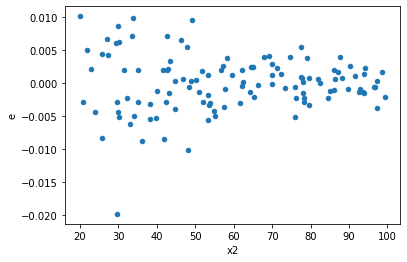

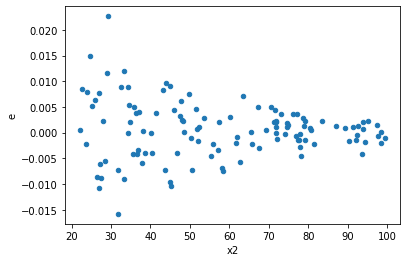

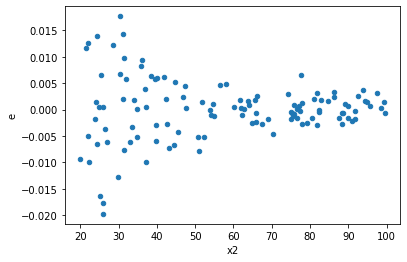

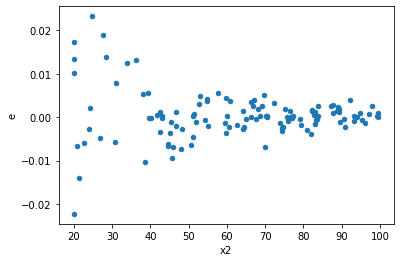

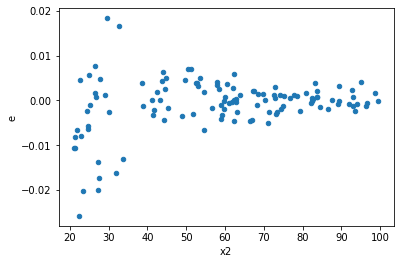

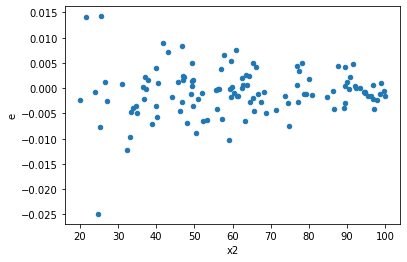

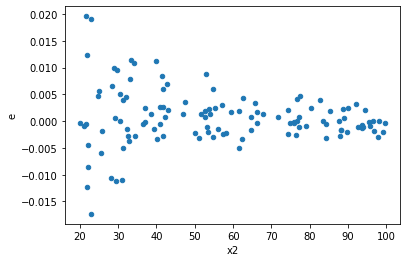

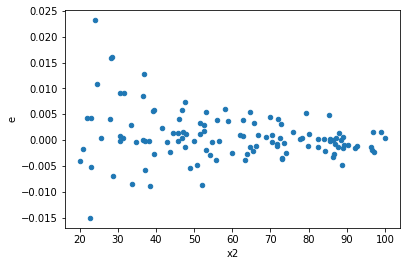

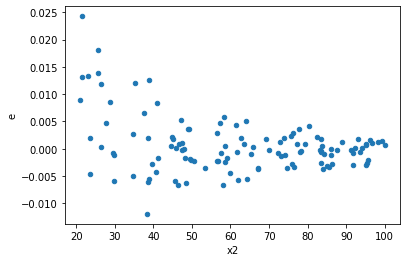

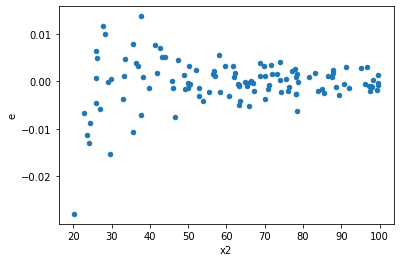

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,48.0,68.0,0.0004484588422675036,0.0029392385818904593,9.342892547239659e-06,4.3224096792506754e-05,4.62641484678931,1.0810794703886017e-08,0.9999999945946026,5.405397351943009e-09,Reject001=0 : Heteroscedasticity
2.0,71.0,45.0,0.0013455837571737582,0.0025275200986661908,1.895188390385575e-05,5.616711330369313e-05,2.9636691311867924,0.00016872602010753468,0.9999156369899462,8.436301005376734e-05,Reject001=0 : Heteroscedasticity
4.0,58.0,58.0,0.0006872227952288718,0.00310719310755343,1.1848668883256411e-05,5.357229495781776e-05,4.5213766614342505,4.241612860944599e-08,0.9999999787919357,2.1208064304722996e-08,Reject001=0 : Heteroscedasticity
6.0,72.0,44.0,0.0007267549755389988,0.002361028727212209,1.0093819104708316e-05,5.365974380027748e-05,5.316099213155862,3.6638174494285636e-08,0.9999999816809128,1.8319087247142818e-08,Reject001=0 : Heteroscedasticity
7.0,66.0,50.0,0.0004459980554550497,0.002037652951762427,6.7575462947734805e-06,4.075305903524854e-05,6.030748034500091,8.260867545573092e-10,0.9999999995869566,4.130433772786546e-10,Reject001=0 : Heteroscedasticity
8.0,69.0,47.0,0.0007534095037697422,0.001831038579336958,1.091897831550351e-05,3.895826764546719e-05,3.5679407468143416,1.0186264074008022e-05,0.999994906867963,5.093132037004011e-06,Reject001=0 : Heteroscedasticity
10.0,63.0,53.0,0.0007594730575391963,0.0026463698567244886,1.205512789744756e-05,4.9931506730650726e-05,4.14193089906767,4.0545499868649415e-07,0.9999997972725007,2.0272749934324708e-07,Reject001=0 : Heteroscedasticity
12.0,70.0,46.0,0.0011724271514532581,0.0017061818775535133,1.6748959306475117e-05,3.7090910381598116e-05,2.2145202996140085,0.004810203923385048,0.9975948980383075,0.002405101961692524,Reject001=0 : Heteroscedasticity
13.0,49.0,67.0,0.0002595831065884367,0.0028846043694207056,5.297614420172178e-06,4.3053796558517994e-05,8.127015887486712,2.375877272697835e-14,0.9999999999999881,1.1879386363489175e-14,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,64.0,0.0012834079646153634,0.0007449665699964674,2.4680922396449295e-05,1.1640102656194802e-05,0.4716234859143432,0.00580536988914965,Reject001=0 : Heteroscedasticity
1.0,48.0,68.0,0.0004484588422675036,0.0029392385818904593,9.342892547239659e-06,4.3224096792506754e-05,4.62641484678931,1.0810794703886017e-08,Reject001=0 : Heteroscedasticity
2.0,71.0,45.0,0.0013455837571737582,0.0025275200986661908,1.895188390385575e-05,5.616711330369313e-05,2.9636691311867924,0.00016872602010753468,Reject001=0 : Heteroscedasticity
3.0,66.0,50.0,0.0035154483164415756,0.00028650224237728394,5.326436843093296e-05,5.730044847545679e-06,0.1075774484208094,9.154076285400788e-16,Reject001=0 : Heteroscedasticity
4.0,58.0,58.0,0.0006872227952288718,0.00310719310755343,1.1848668883256411e-05,5.357229495781776e-05,4.5213766614342505,4.241612860944599e-08,Reject001=0 : Heteroscedasticity
5.0,70.0,46.0,0.002275141643068156,0.00041231988667431223,3.250202347240223e-05,8.963475797267657e-06,0.2757820849178399,1.2477730607482742e-06,Reject001=0 : Heteroscedasticity
6.0,72.0,44.0,0.0007267549755389988,0.002361028727212209,1.0093819104708316e-05,5.365974380027748e-05,5.316099213155862,3.6638174494285636e-08,Reject001=0 : Heteroscedasticity
7.0,66.0,50.0,0.0004459980554550497,0.002037652951762427,6.7575462947734805e-06,4.075305903524854e-05,6.030748034500091,8.260867545573092e-10,Reject001=0 : Heteroscedasticity
8.0,69.0,47.0,0.0007534095037697422,0.001831038579336958,1.091897831550351e-05,3.895826764546719e-05,3.5679407468143416,1.0186264074008022e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    965
Reject001=1 : Homoscedasticity       35
Name: Result_test, dtype: int64